In [1]:
#importing necessary python libraries
!pip install pandas
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Aleena Omair\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
file="C:\\Users\\Aleena Omair\\Desktop\\babar_azam_in_t20.csv"
data=pd.read_csv(file)
print(data.head())

   Unnamed: 0  Runs Mins  BF  4s  6s      SR  Pos Dismissal  Inns  \
0           0   122   77   4  15   4  206.77    2    caught     2   
1           1    97    -   1  13   1  167.24    2   not out     1   
2           2    90   78   1  13   1  155.17    1    caught     2   
3           3    86    -   2  10   2  165.38    3    caught     1   
4           4    85   76   3   8   3  173.46    2    caught     1   

       Opposition        Ground  Start Date  
0  v South Africa     Centurion  2021-04-14  
1   v West Indies       Karachi  2018-04-02  
2  v South Africa  Johannesburg  2019-02-03  
3      v World-XI        Lahore  2017-09-12  
4       v England    Nottingham  2021-07-16  


In [3]:
print(data.tail())

    Unnamed: 0  Runs Mins  BF  4s  6s    SR  Pos Dismissal  Inns  \
64          64     1    -   0   0   0  50.0    3       lbw     2   
65          65     1   10   0   0   0  20.0    2    bowled     2   
66          66     0    -   0   0   0   0.0    1    caught     2   
67          67     0    2   0   0   0   0.0    2   run out     1   
68          68     0    5   0   0   0   0.0    2    caught     1   

        Opposition     Ground  Start Date  
64     v Sri Lanka  Abu Dhabi  2017-10-27  
65    v Bangladesh     Mirpur  2021-11-20  
66    v Bangladesh     Lahore  2020-01-24  
67  v South Africa     Lahore  2021-02-11  
68   v West Indies    Karachi  2021-12-13  


In [5]:
#looking if dataset contains any null values
print(data.isnull().sum())

Unnamed: 0    0
Runs          0
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64


In [6]:
#creating a dataframe to have a better look
df=pd.DataFrame(data)
df

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,0,122,77,4,15,4,206.77,2,caught,2,v South Africa,Centurion,2021-04-14
1,1,97,-,1,13,1,167.24,2,not out,1,v West Indies,Karachi,2018-04-02
2,2,90,78,1,13,1,155.17,1,caught,2,v South Africa,Johannesburg,2019-02-03
3,3,86,-,2,10,2,165.38,3,caught,1,v World-XI,Lahore,2017-09-12
4,4,85,76,3,8,3,173.46,2,caught,1,v England,Nottingham,2021-07-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,64,1,-,0,0,0,50.00,3,lbw,2,v Sri Lanka,Abu Dhabi,2017-10-27
65,65,1,10,0,0,0,20.00,2,bowled,2,v Bangladesh,Mirpur,2021-11-20
66,66,0,-,0,0,0,0.00,1,caught,2,v Bangladesh,Lahore,2020-01-24
67,67,0,2,0,0,0,0.00,2,run out,1,v South Africa,Lahore,2021-02-11


In [7]:
#having a look at the number of runs 
data["Runs"].sum()

2686

In [8]:
#having a look at the average
data["Runs"].mean()

38.927536231884055

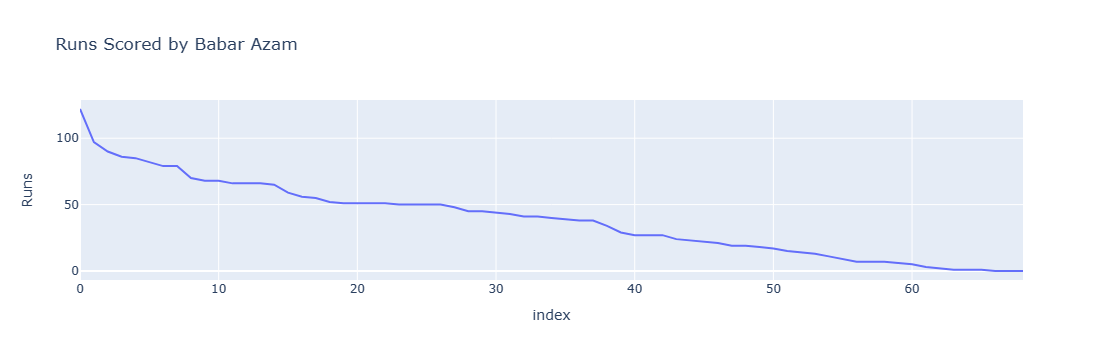

In [11]:
#having a look at the trend of runs scored by Babar Azam in his career by plotting a line graph
matches = data.index
figure = px.line(data, x=matches, y="Runs", 
                 title='Runs Scored by Babar Azam')
figure.show()

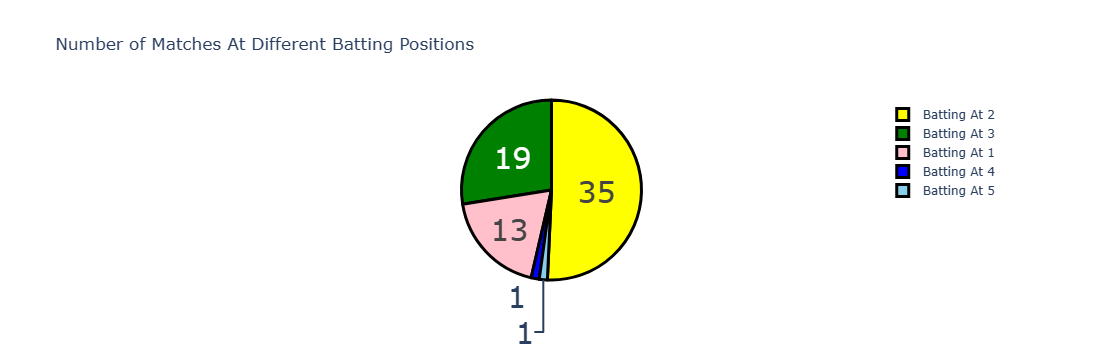

In [12]:
#now let’s see all the batting positions played by Babar Azam
data["Pos"] = data["Pos"].map({3.0: "Batting At 3", 4.0: "Batting At 4", 2.0: "Batting At 2", 
                               1.0: "Batting At 1", 7.0:"Batting At 7", 5.0:"Batting At 5", 
                               6.0: "batting At 6"})

#use of value_counts() function to count the occurrences of each unique batting position in the "Pos" column. 

Pos = data["Pos"].value_counts()

#preparing the data for the pie chart, where label will be the labels for different segments of the pie chart, and counts will be the corresponding values determining the sizes of these segments.

label = Pos.index
counts = Pos.values

#Each color corresponds to a different batting position. 
colors = ['yellow','green', "pink", "blue", "skyblue", "purple", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Number of Matches At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

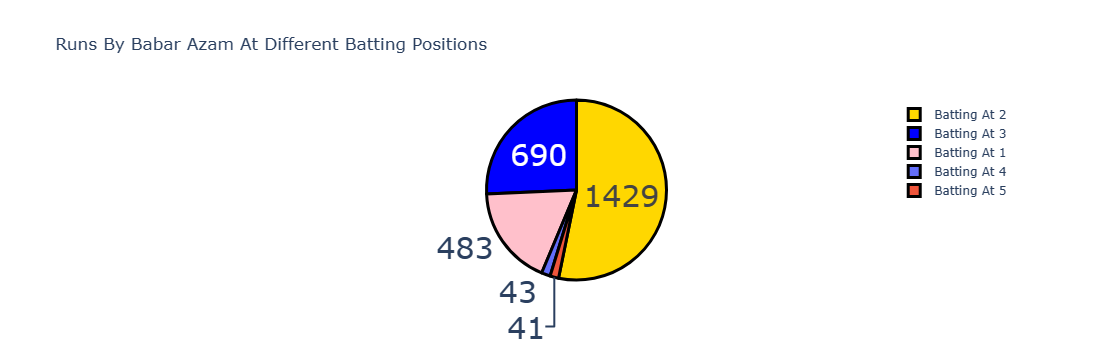

In [14]:
#Now let’s have a look at the total runs scored by Babar Azam in different positions:
label = data["Pos"]
counts = data["Runs"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Runs By Babar Azam At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

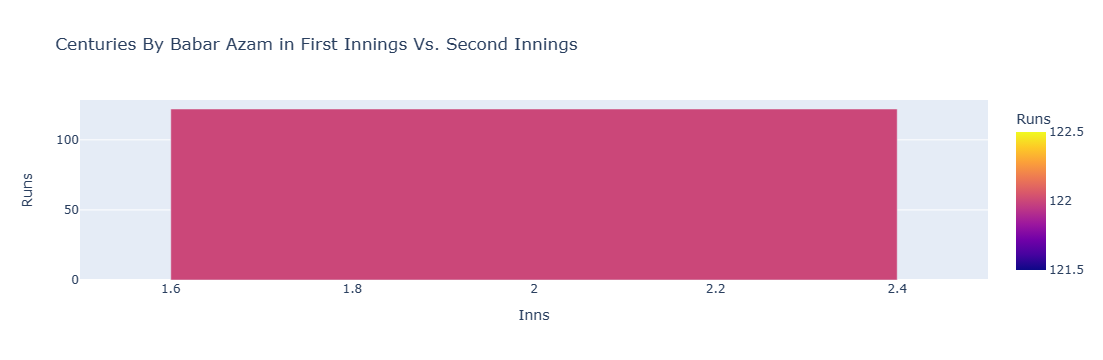

In [15]:
#Now let’s have a look at the number of centuries scored by Babar Azam while batting in the first innings and second innings:
centuries = data.query("Runs >= 100")
figure = px.bar(centuries, x=centuries["Inns"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Centuries By Babar Azam in First Innings Vs. Second Innings")
figure.show()

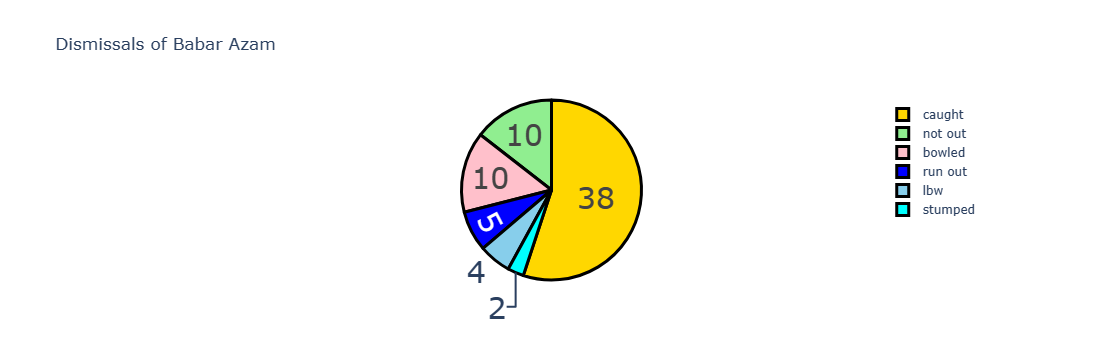

In [18]:
#Now let’s have a look at the kind of dismissals Babar Azam faced most of the time:
dismissal = data["Dismissal"].value_counts()
label = dismissal.index
counts = dismissal.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Dismissals of Babar Azam')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

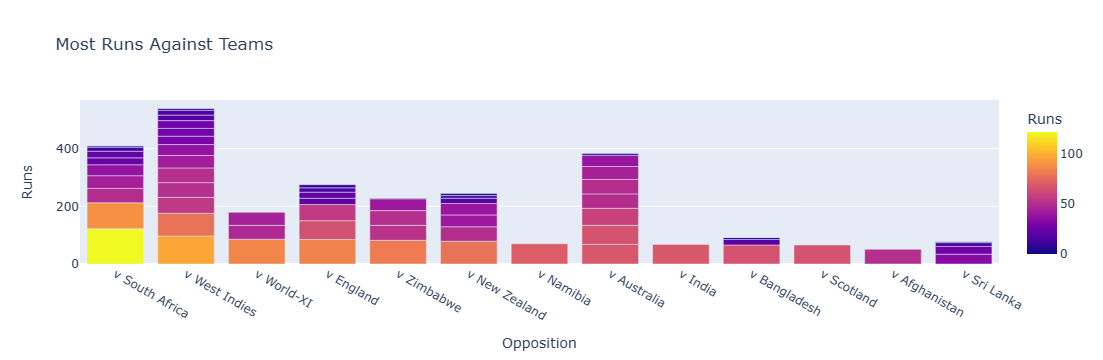

In [19]:
#Now let’s have a look at against which team Babar Azam scored most of his runs:
figure = px.bar(data, x=data["Opposition"], y = data["Runs"], color = data["Runs"],
            title="Most Runs Against Teams")
figure.show()

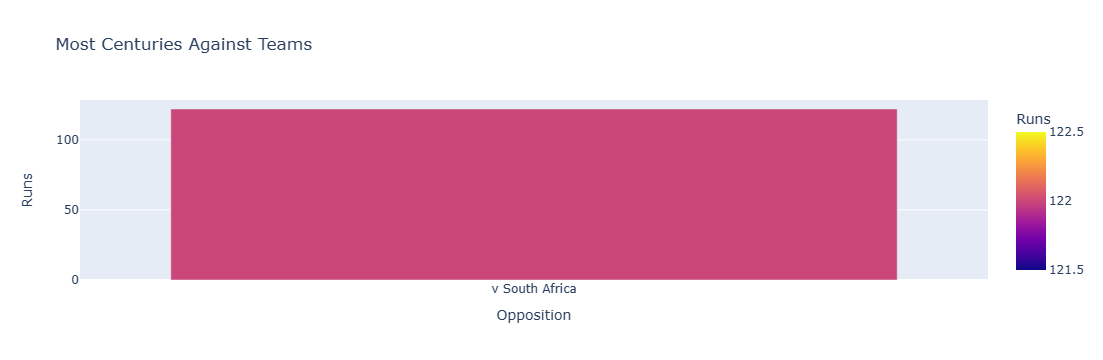

In [20]:
#Now let’s have a look at against which team Babar Azam scored most of his centuries:
figure = px.bar(centuries, x=centuries["Opposition"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Most Centuries Against Teams")
figure.show()